# Importing the Dependencies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

# Dataset: Data Collection and Data Processing
- https://www.kaggle.com/datasets/altavish/boston-housing-dataset

In [70]:
# loading the dataset to a pandas Dataframe
house_price_data = pd.read_csv("Dataset/housingprice.csv")
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [71]:
# Create New Column: Copy values from MEDV to price.
# Remove Original Column: Drop MEDV with inplace=True.
house_price_data['price'] = house_price_data['MEDV']
house_price_data.drop(columns= 'MEDV', inplace=True)
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [72]:
# number of rows and column
house_price_data.shape

(506, 14)

In [73]:
# count of missing values in each column
house_price_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
price       0
dtype: int64

In [74]:
house_price_data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
# fills missing values with the mean of each column.
house_price_data.fillna(house_price_data.mean(), inplace=True)
house_price_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [76]:
# describe --> statistical measures of the data
house_price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation:
- Measures the strength and direction of the relationship between two variables.
- Values range from -1 to 1:
    * 1: Perfect positive correlation.
    * -1: Perfect negative correlation.
    * 0: No correlation.

- Identify Relationships: Helps understand how one variable changes with another.
- Feature Selection: Useful in selecting important features for machine learning models.

In [77]:
# computes the correlation matrix for the DataFrame.
correlation = house_price_data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


# Heatmap:
- A graphical representation of data where individual values are represented by colors.
- In the context of a correlation matrix, it shows the strength of relationships between variables.
- Visualize Correlations: Makes it easy to see which variables are strongly or weakly correlated.
- Identify Patterns: Helps quickly identify patterns and relationships in the data.

<Axes: >

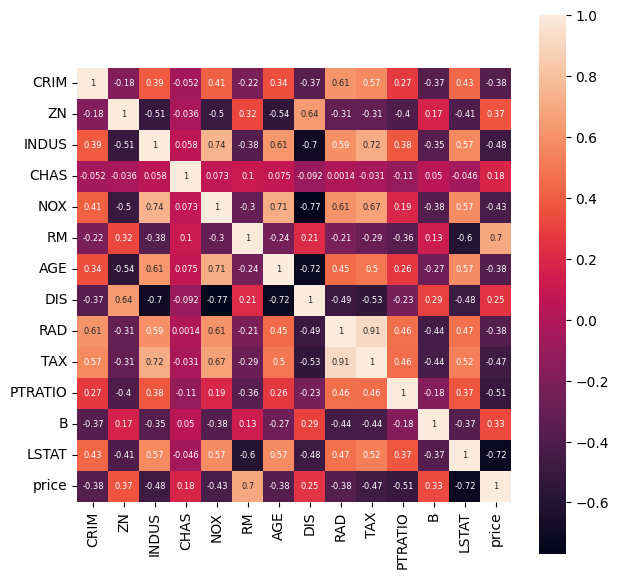

In [78]:
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={'size': 6})

In [79]:
# Separating data and labels
X = house_price_data.drop(columns='price', axis=1)
Y = house_price_data['price']

In [80]:
# Training and Test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [81]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(506, 13)
(455, 13)
(51, 13)


# XGBoost
- The XGBRegressor is a class from the xgboost library used for regression tasks.
- XGBRegressor is an implementation of the gradient boosting framework specifically for regression 
- Predict Continuous Values: Used to predict continuous target variables, such as house prices or stock prices.
- Boosting: Combines the predictions of several base estimators to improve robustness and accuracy.

In [82]:
# Model Training --> XGBoost
model = XGBRegressor()
# training the XGBoost model with training data and labels
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# R² Score
The R² score, or coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
Range: 0 to 1 (sometimes negative if the model is worse than a horizontal line).

    - 1: Perfect prediction.
    - 0: No predictive power.

Indicates how well the model explains the variability of the target variable.
# Mean Absolute Error (MAE)
- The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
- Range: 0 to ∞.
- 0: Perfect prediction.
- Provides a straightforward measure of prediction accuracy by averaging the absolute differences between predicted and actual values

# Model Evaluation on Trainig Data

In [83]:
pred_train = model.predict(x_train)

R_score_train = metrics.r2_score(y_train, pred_train) 
MAE_train = metrics.mean_absolute_error(y_train, pred_train)

print(f'R Score: {R_score_train} and Mean Absolute Error: {MAE_train} on training data')

R Score: 0.9999955372329693 and Mean Absolute Error: 0.01318752875694867 on training data


# Model Evaluation on Testing Data

In [84]:
pred_test = model.predict(x_test)

R_score_test = metrics.r2_score(y_test, pred_test) 
MAE_test = metrics.mean_absolute_error(y_test, pred_test)
print(f'R Score: {R_score_test} and Mean Absolute Error: {MAE_test} on testing data')

R Score: 0.8578445218175197 and Mean Absolute Error: 2.4410483191995063 on testing data


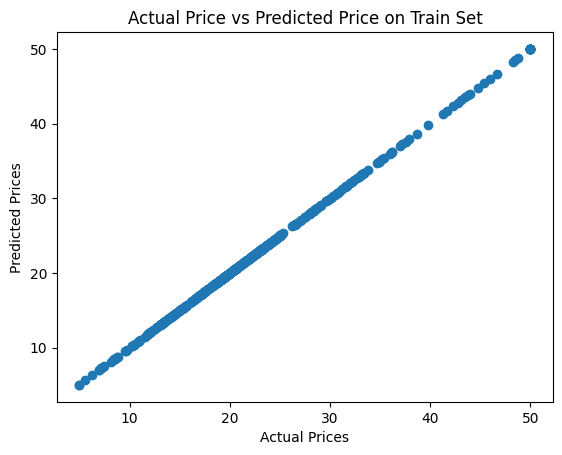

In [87]:
plt.scatter(y_train, pred_train)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual Price vs Predicted Price on Train Set")
plt.show()

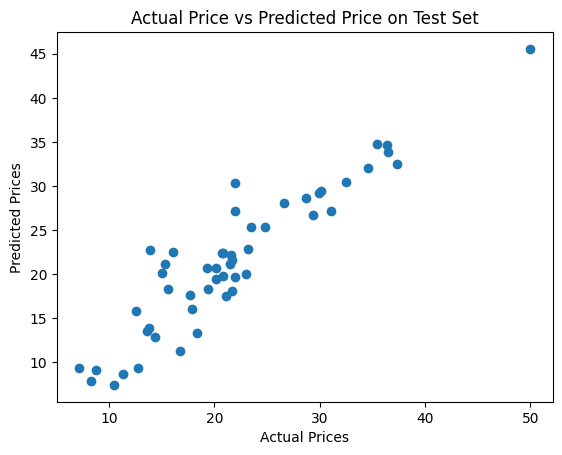

In [86]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Prices")
plt.ylabel('Predicted Prices')
plt.title("Actual Price vs Predicted Price on Test Set")
plt.show()
